In [12]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import os
import numpy as np
import cv2 as cv

# Get current directory and go to it's parent directory
print(os.getcwd())
os.chdir("../concat_data")
print(os.listdir(os.getcwd()))



c:\Users\Luis\OneDrive\Concordia\Winter 2024\AI\project\repo\COMP472\concat_data
['concat_data.7z', 'focused', 'happy', 'neutral', 'normalized-greyscale.zip', 'surprised']


In [13]:

# Dictionary of images sorted by emotion
dict_images = {'focused': [], 'happy': [], 'neutral' : [], 'surprised': []}

# Attain all images from each emotion
for folder in os.listdir(os.getcwd()):
    print("Current folder: ", folder)
    if (folder == "Script"): # Skips the folder with script in it
        continue
  
    if (folder in dict_images.keys()) :
        for image in os.listdir(folder): # Checks through directory to find .jpg files
            if image.endswith('.jpg'):
                dict_images[folder].append(str(image)) # Stores in the dictionary with specific emotion index

for key in dict_images:
    print(key)
    print(len(dict_images[key]))


Current folder:  concat_data.7z
Current folder:  focused
Current folder:  happy
Current folder:  neutral
Current folder:  normalized-greyscale.zip
Current folder:  surprised
focused
500
happy
500
neutral
500
surprised
500


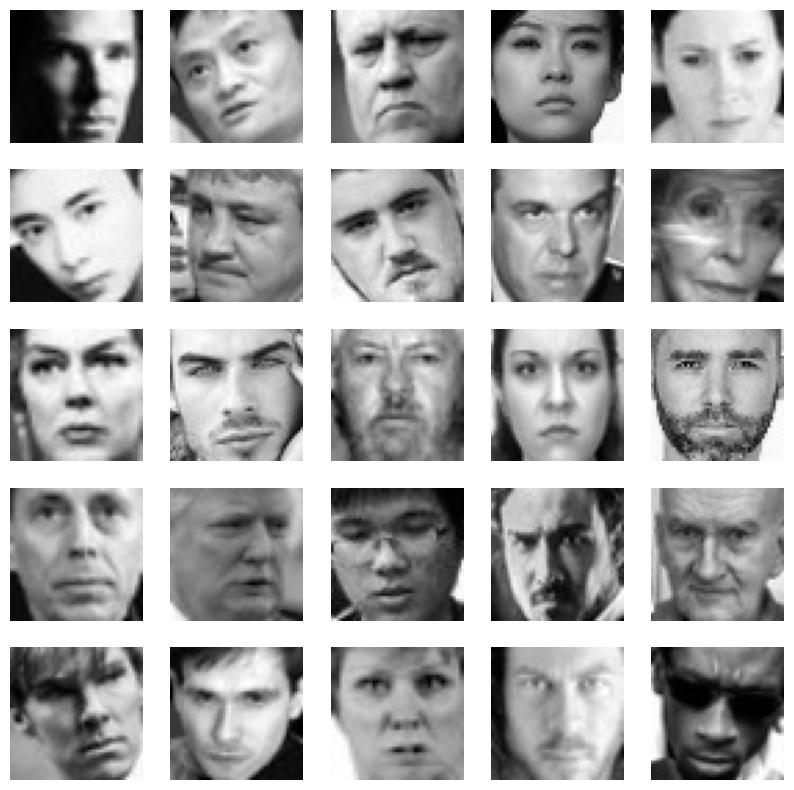

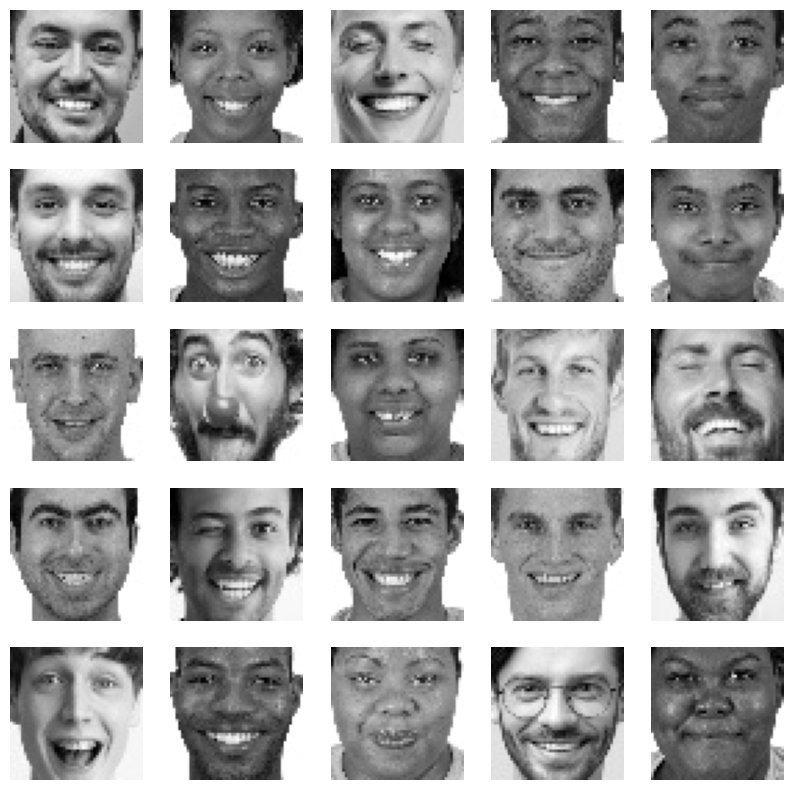

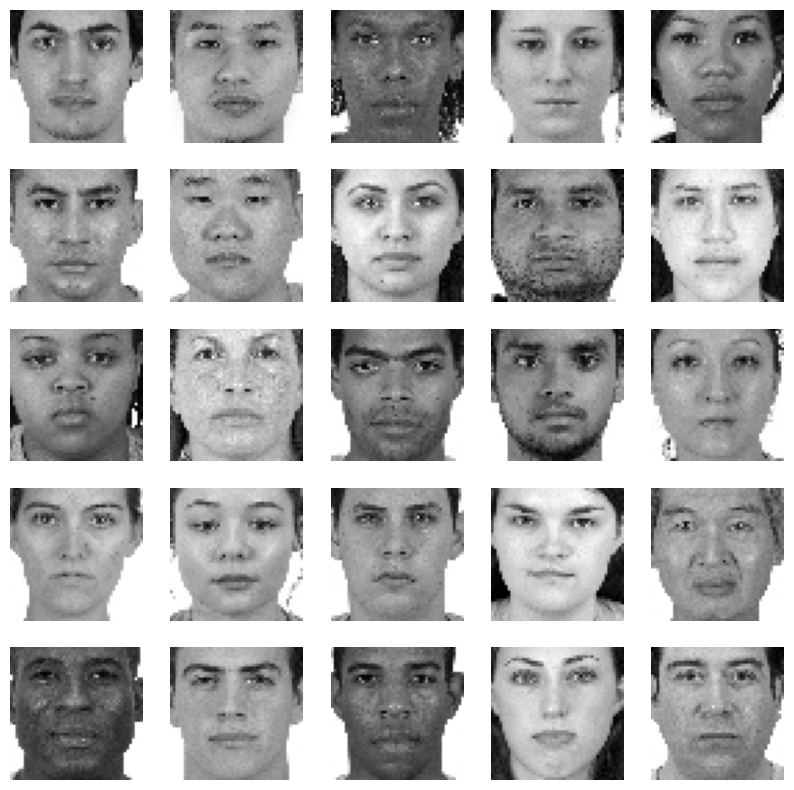

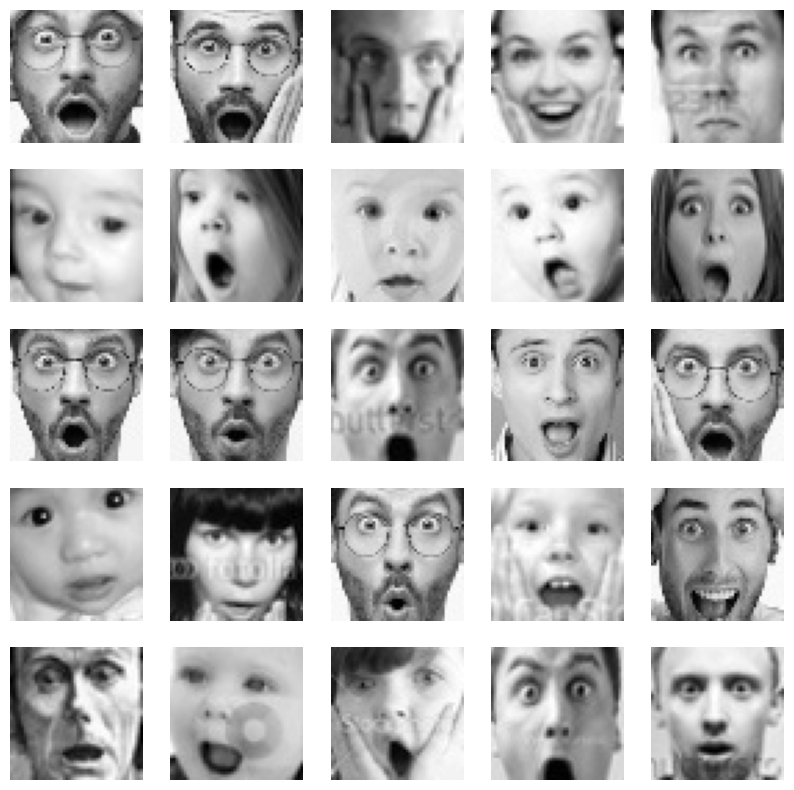

In [14]:

# Plotting images in 5x5 grid    
rows = 5
columns = 5

# Plotting each emotion grid
for emotion in dict_images:
    # Shuffling the array and picking the first 25 images
    np.random.shuffle(dict_images[emotion])
    disp_img = dict_images[emotion][:25]

    fig = plt.figure(figsize=(10,10))
    
    for i, file_name in enumerate(disp_img):
       img = mpimg.imread(emotion + "/" + file_name)
       plt.subplot(rows, columns, i + 1)
      #  plt.imshow(img)
       plt.imshow(img, cmap='gray')
       plt.axis('off')

    plt.show()
   #  plt.savefig('../preprocessing/5x5_grid_%s.png'%(emotion))




In [28]:


#grab each category and append it to a list
dict_images_values = {'focused': {}, 'happy': {}, 'neutral' : {}, 'surprised': {}}

for folder in os.listdir(os.getcwd()):

    #generate a list for each R, G, and B value
    red_pixel_arr = []
    green_pixel_arr = []
    blue_pixel_arr = []

    # iterage through the 25 selected images
    if (folder in dict_images.keys()) :
        for image in dict_images[folder]:

            img_array = cv.imread(folder + "/" + image)
            
            #convert to rgb
            img_array = cv.cvtColor(img_array, cv.COLOR_BGR2RGB)

            #flatten the 2D array into a 1 dimensional array
            #it will contain a pixel intensity array for
            # each R, G, and B value like so: [R, G, B, R, G, B, ...]

            img_array_1D = img_array.flatten()
            # print(len(img_array_1D))


            # iterate through the array and append to the respective array
            i = 0
            while i < len(img_array_1D):
                red_pixel_arr.append(img_array_1D[i])
                green_pixel_arr.append(img_array_1D[i+1])
                blue_pixel_arr.append(img_array_1D[i+2])
                i += 3

                #failsafe for unprocessed images
                if (len(red_pixel_arr) > 1000000):
                    break
            print(len(red_pixel_arr))

        # append the arrays to the dictionary
        dict_images_values[folder]['red'] = red_pixel_arr
        dict_images_values[folder]['green'] = green_pixel_arr
        dict_images_values[folder]['blue'] = blue_pixel_arr




6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912
6912


In [27]:
len(dict_images_values["focused"]['red'])/25

40002.64

generating graph for key: focused
generating graph for key: happy
generating graph for key: neutral
generating graph for key: surprised


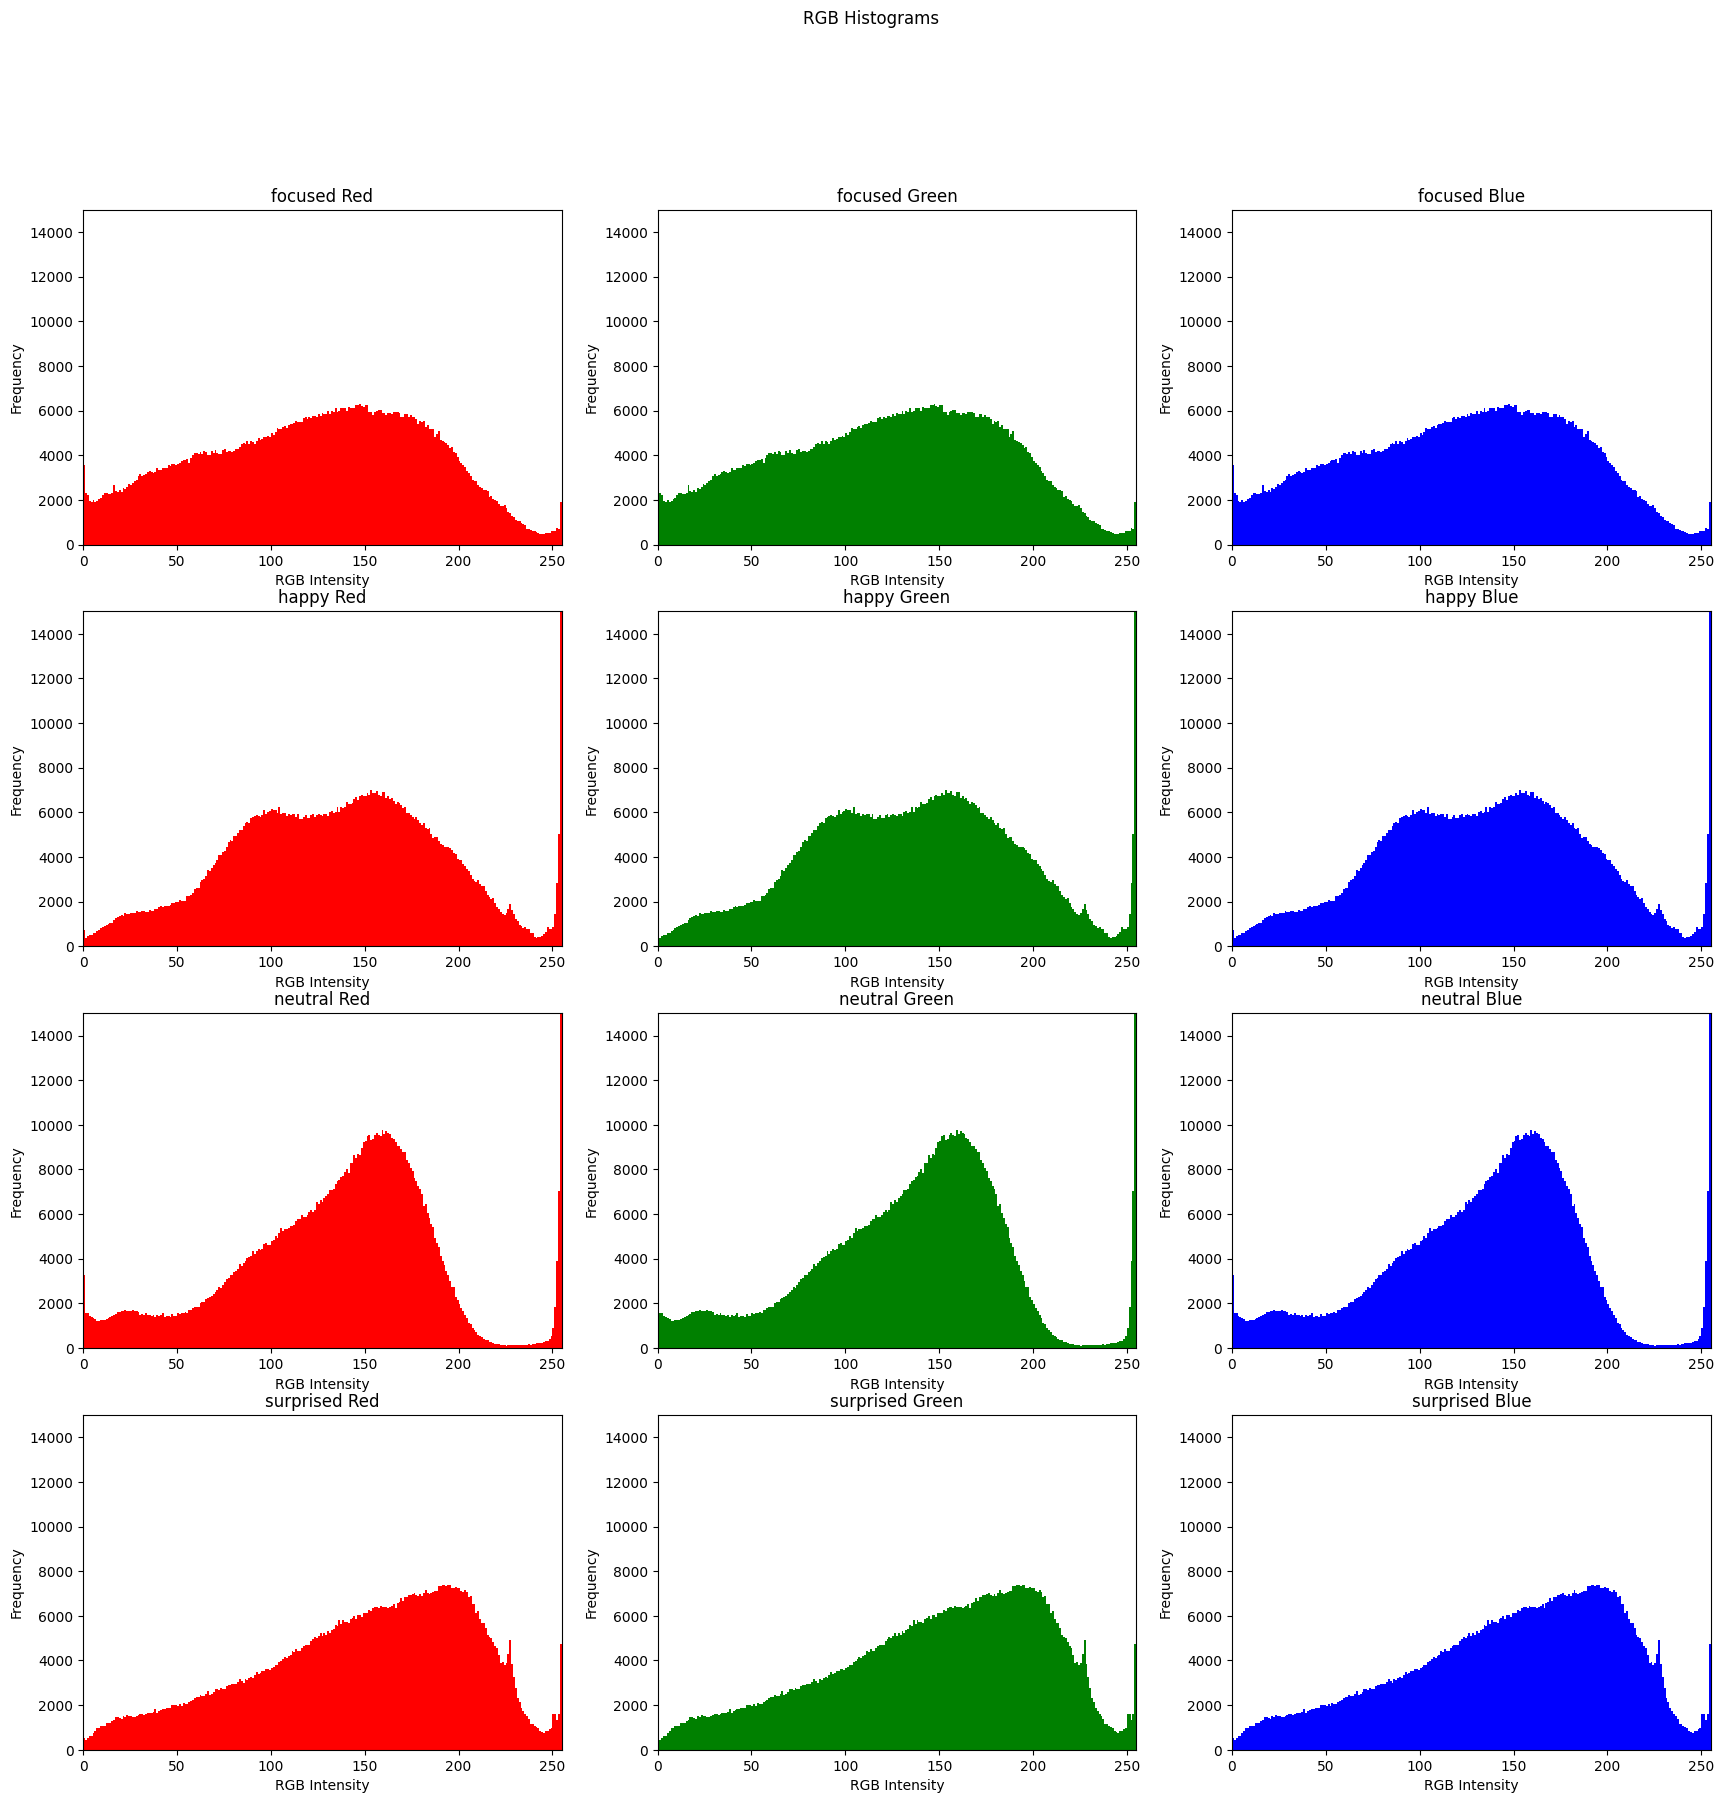

In [24]:

#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(21, 20)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images_values:
    #add title to each row
    print("generating graph for key: " + key)

    # set histogram values
    axs[i, 0].hist(dict_images_values[key]['red'], bins=255, color='red')
    axs[i, 1].hist(dict_images_values[key]['green'], bins=255, color='green')
    axs[i, 2].hist(dict_images_values[key]['blue'], bins=255, color='blue')

    # set histogram titles
    axs[i, 0].set_title(key + " Red")
    axs[i, 1].set_title(key + " Green")
    axs[i, 2].set_title(key + " Blue")

    #set histogram x-axis limits
    axs[i, 0].set_xlim([0, 255])
    axs[i, 1].set_xlim([0, 255])
    axs[i, 2].set_xlim([0, 255])

    #set y-axis limits
    axs[i, 0].set_ylim([0, 15000])
    axs[i, 1].set_ylim([0, 15000])
    axs[i, 2].set_ylim([0, 15000])

    #set x-label
    axs[i, 0].set_xlabel('RGB Intensity')
    axs[i, 1].set_xlabel('RGB Intensity')
    axs[i, 2].set_xlabel('RGB Intensity')

    #set y-label
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 2].set_ylabel('Frequency')

    

    i = i + 1
        
#Export plot as a png
plt.savefig('../preprocessing/histogram.png')








generating grayscale graph for key: focused
generating grayscale graph for key: happy
generating grayscale graph for key: neutral
generating grayscale graph for key: surprised


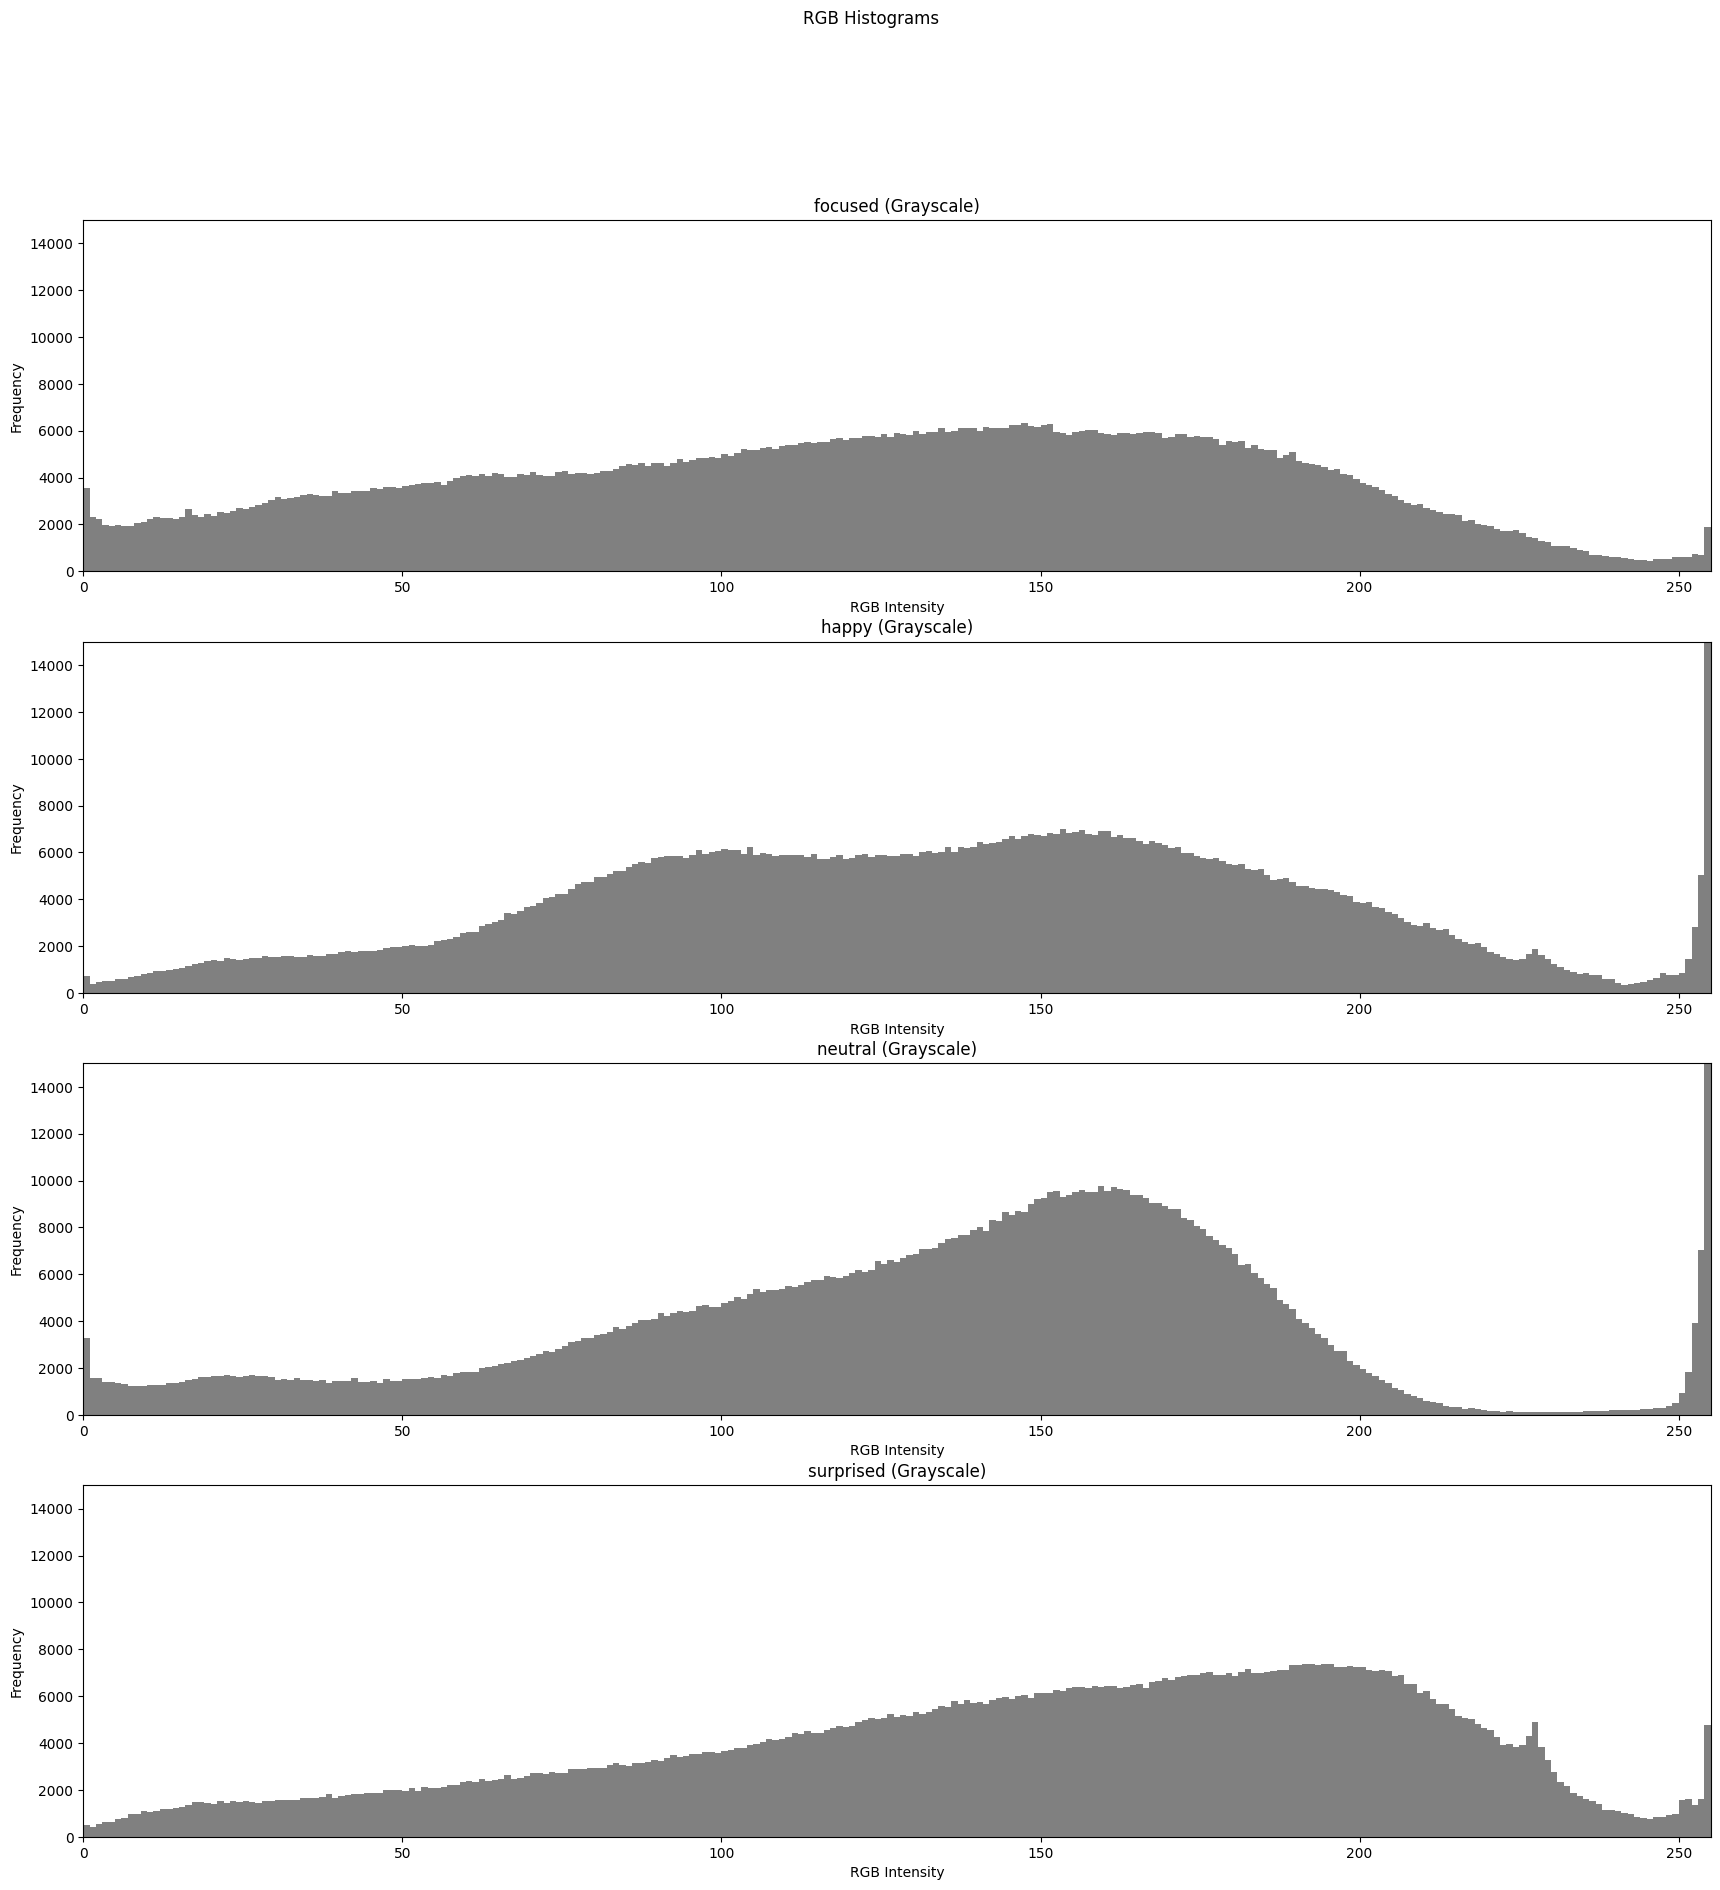

In [25]:
#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(21, 21)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images_values:
    #add title to each row
    print("generating grayscale graph for key: " + key)

    # set histogram values
    axs[i].hist(dict_images_values[key]['red'], bins=255, color='grey')

    # set histogram titles
    axs[i].set_title(key + " (Grayscale)")

    #set histogram x-axis limits
    axs[i].set_xlim([0, 255])

    #set y-axis limits
    axs[i].set_ylim([0, 15000])

    #set x-label
    axs[i].set_xlabel('RGB Intensity')

    #set y-label
    axs[i].set_ylabel('Frequency')

    i = i + 1
        
#Export plot as a png
plt.savefig('../preprocessing/histogram.png')


In [ ]:
#make 3x4 plot for each folder
fig, axs = plt.subplots(4, 1)
fig.set_size_inches(21, 21)
fig.suptitle('RGB Histograms')

i = 0
for key in dict_images:
    #add title to each row
    print("generating grayscale graph for key: " + key)

    # set histogram values
    axs[i].hist(dict_images_values[key]['red'], bins=255, color='grey')

    # set histogram titles
    axs[i].set_title(key + " (Grayscale)")

    #set histogram x-axis limits
    axs[i].set_xlim([0, 255])

    #set y-axis limits
    axs[i].set_ylim([0, 15000])

    #set x-label
    axs[i].set_xlabel('RGB Intensity')

    #set y-label
    axs[i].set_ylabel('Frequency')

    i = i + 1